# Let the EDA begin

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
# Plotting libraries:
import seaborn as sbn
import matplotlib.pyplot as plt
from tqdm import tqdm

# Encoding and Transformation libraries:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

# ML libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import rmse

from jupyterthemes import jtplot
jtplot.style(theme='onedork')
pd.set_option('display.max_columns', None)

## Load data

In [2]:
train_init=pd.read_csv('train.csv')
train_init.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [3]:
train_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [4]:
train_init[train_init['Time_of_service']==0]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
11,EID_19087,F,19.0,5,Single,Springfield,Operarions,Analytical,0.0,0,25,1,2,5.0,type4,1.0,3,-1.8176,-0.4537,2.0,3,6,3,0.0800
14,EID_20902,F,19.0,3,Married,Washington,Human Resource Management,Directive,0.0,0,74,0,2,9.0,type2,3.0,3,-0.9612,1.8688,2.0,4,6,3,0.0318
15,EID_20121,F,NaN,3,Married,Springfield,Logistics,Analytical,0.0,0,32,1,2,6.0,type2,2.0,3,0.7516,-1.6150,1.0,3,8,3,0.1331
34,EID_20761,F,19.0,5,Single,Lebanon,Operarions,Behavioral,0.0,0,39,2,3,4.0,type2,4.0,3,NaN,-0.4537,1.0,2,8,3,0.2637
142,EID_21172,F,19.0,4,Married,Clinton,Security,Analytical,0.0,0,42,1,2,7.0,type2,3.0,2,-0.1048,1.8688,2.0,3,8,3,0.1638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,EID_23298,F,19.0,4,Married,Washington,Operarions,Conceptual,0.0,0,56,0,2,6.0,type2,2.0,3,1.6081,0.7075,1.0,1,7,2,0.1740
6796,EID_18697,F,NaN,3,Married,Washington,IT,Behavioral,0.0,0,71,1,1,5.0,type2,1.0,3,-1.8176,1.8688,2.0,4,6,5,0.6376
6871,EID_20343,F,19.0,2,Married,Franklin,Logistics,Behavioral,0.0,0,63,0,3,6.0,type2,2.0,3,0.7516,-1.6150,3.0,2,7,2,0.2798
6907,EID_19453,M,19.0,4,Married,Lebanon,Logistics,Directive,0.0,0,41,1,4,9.0,type3,3.0,4,-0.1048,1.8688,3.0,3,8,2,0.1441


## Analysis:
- 6 column have null values(age,time_of_service,pay_scale,work_life_balance,var2,var4).
- Looking at the mean and max values, it seems there are no extreme ouliers(but checking again won't hurt).

## Let the plotting begin

In [5]:
X_init=train_init.drop('Attrition_rate',axis=1)
Y_init=train_init['Attrition_rate']
X_init.drop('Employee_ID',axis=1,inplace=True)

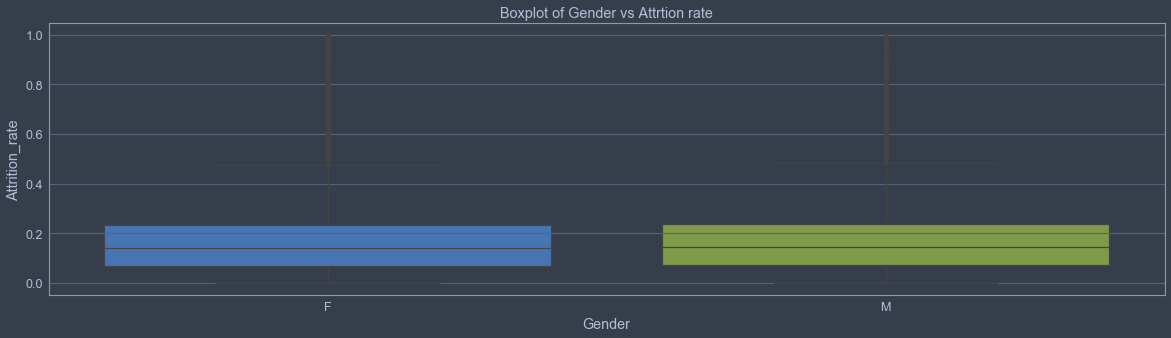

In [6]:
plt.figure(figsize=(20,5))
sbn.boxplot(x="Gender",y='Attrition_rate',data=train_init)
plt.title('Boxplot of Gender vs Attrtion rate')
plt.show()

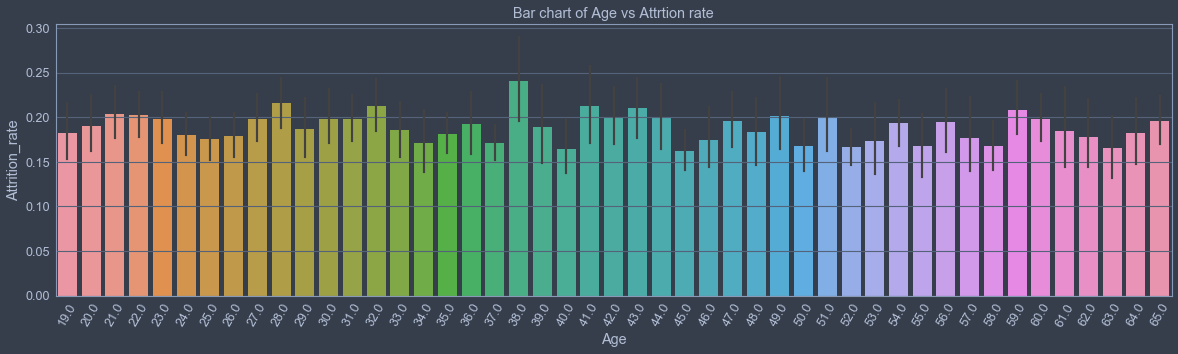

In [7]:
plt.figure(figsize=(20,5))
sbn.barplot(x='Age',y='Attrition_rate',data=train_init)
plt.xticks(rotation = 60)
plt.title('Bar chart of Age vs Attrtion rate')
plt.show()

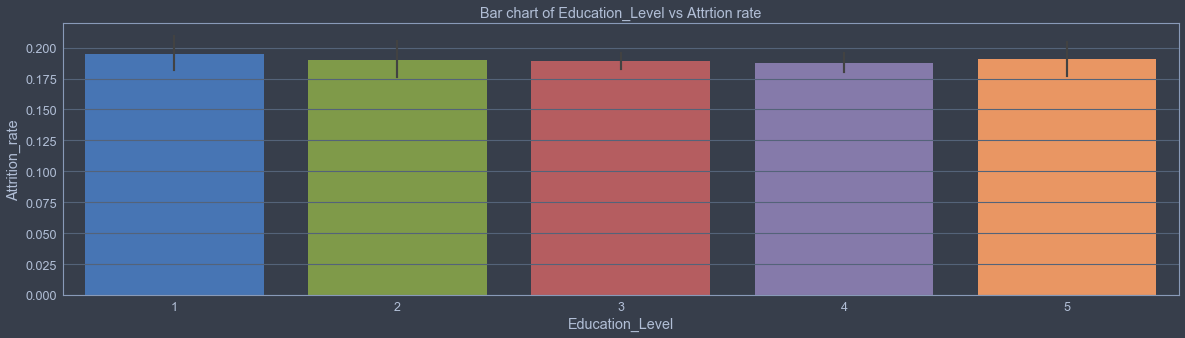

In [8]:
plt.figure(figsize=(20,5))
sbn.barplot(x='Education_Level',y='Attrition_rate',data=train_init)
plt.title('Bar chart of Education_Level vs Attrtion rate')
plt.show()

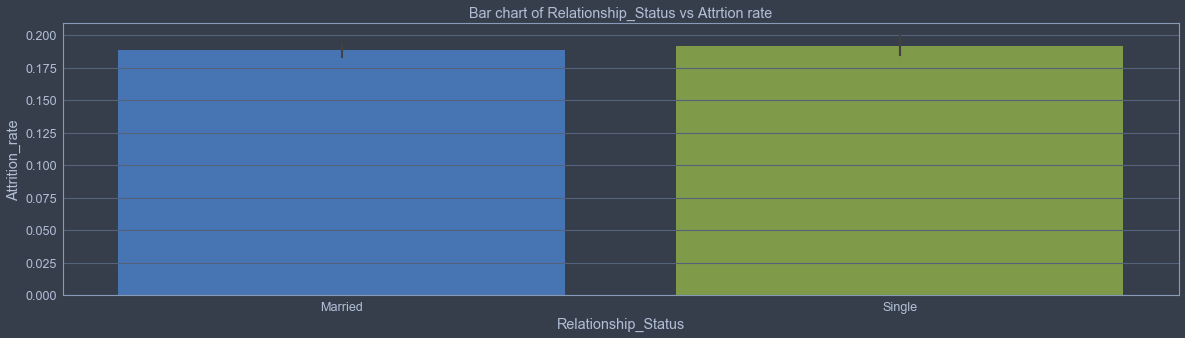

In [9]:
plt.figure(figsize=(20,5))
sbn.barplot(x='Relationship_Status',y='Attrition_rate',data=train_init)
plt.title('Bar chart of Relationship_Status vs Attrtion rate')
plt.show()

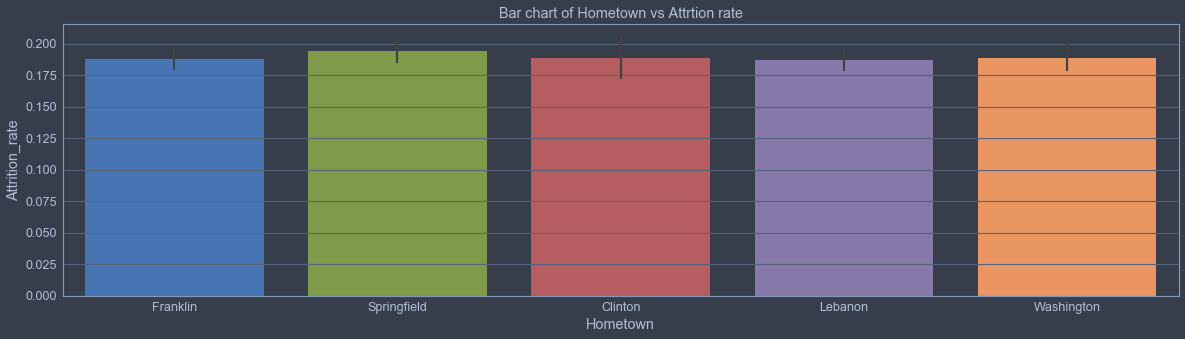

In [10]:
plt.figure(figsize=(20,5))
sbn.barplot(x='Hometown',y='Attrition_rate',data=train_init)
plt.title('Bar chart of Hometown vs Attrtion rate')
plt.show()

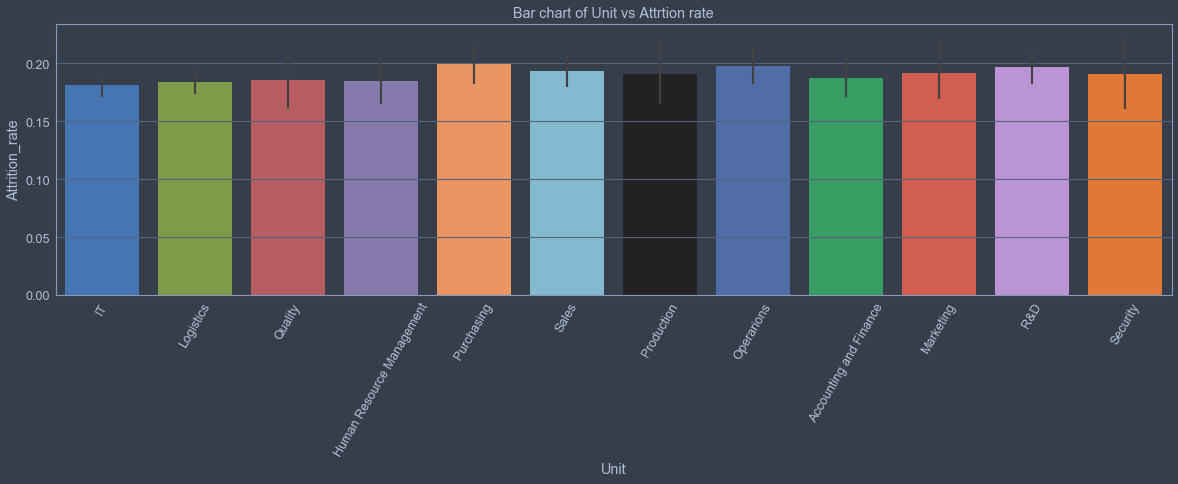

In [11]:
plt.figure(figsize=(20,5))
sbn.barplot(x='Unit',y='Attrition_rate',data=train_init)
plt.xticks(rotation = 60)
plt.title('Bar chart of Unit vs Attrtion rate')
plt.show()

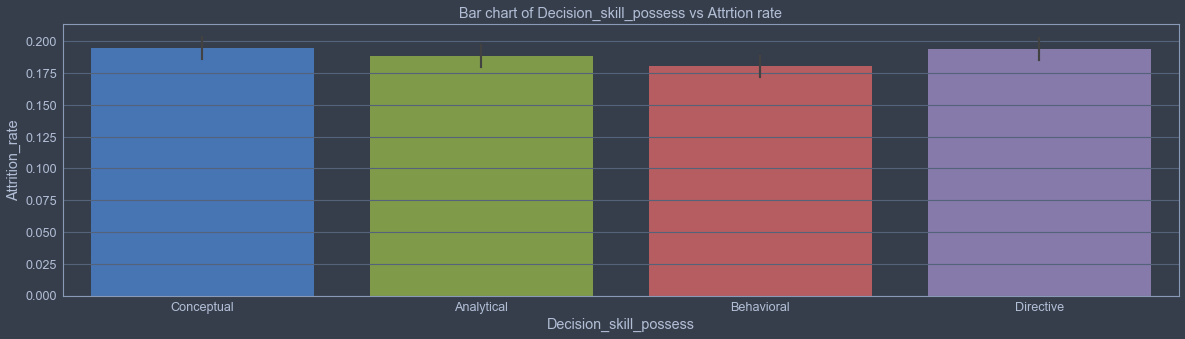

In [12]:
plt.figure(figsize=(20,5))
sbn.barplot(x='Decision_skill_possess',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of Decision_skill_possess vs Attrtion rate')
plt.show()

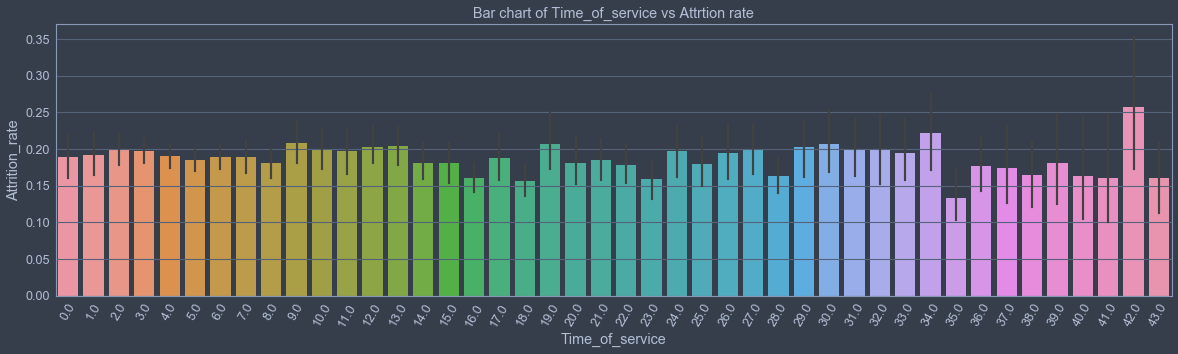

In [13]:
plt.figure(figsize=(20,5))
sbn.barplot(x='Time_of_service',y='Attrition_rate',data=train_init)
plt.xticks(rotation = 60)
plt.title('Bar chart of Time_of_service vs Attrtion rate')
plt.show()

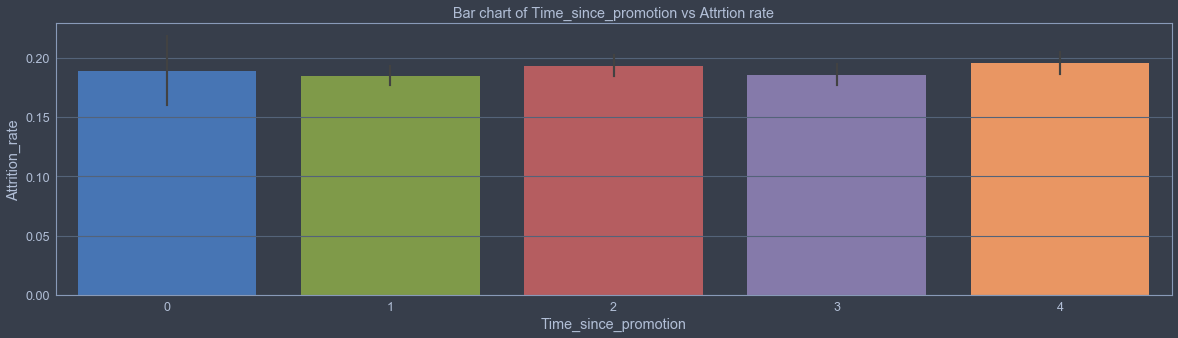

In [14]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='Time_since_promotion',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of Time_since_promotion vs Attrtion rate')
plt.show()

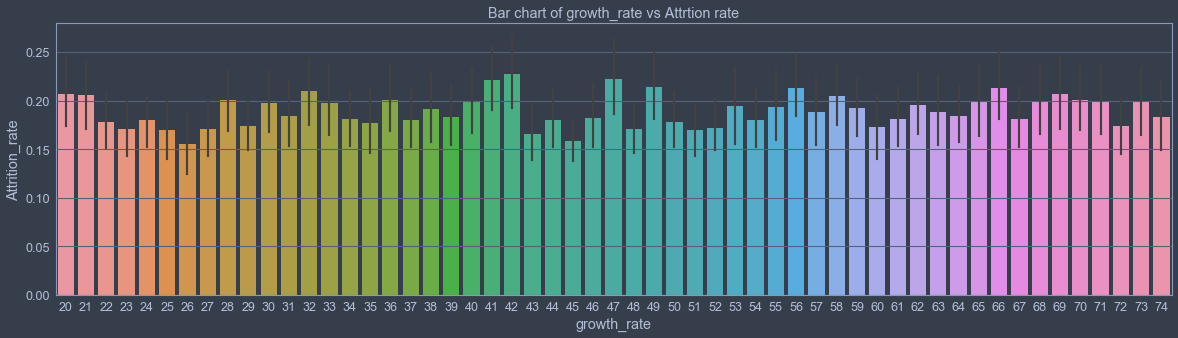

In [272]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='growth_rate',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of growth_rate vs Attrtion rate')
plt.show()

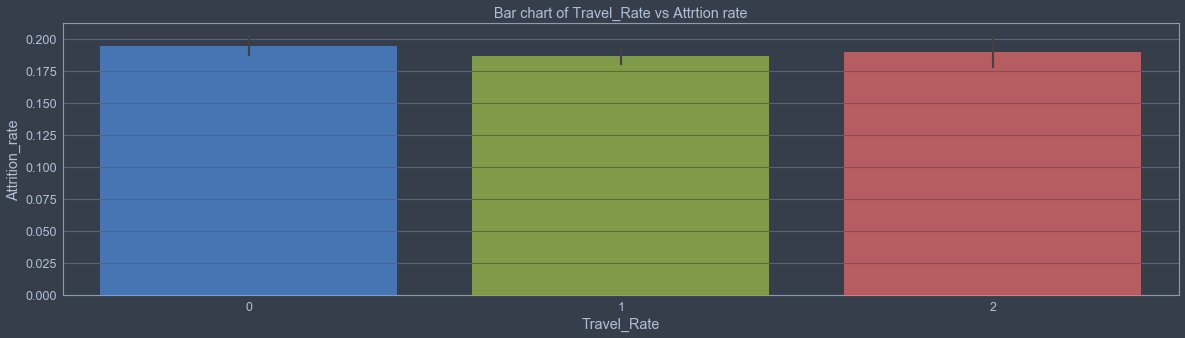

In [273]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='Travel_Rate',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of Travel_Rate vs Attrtion rate')
plt.show()

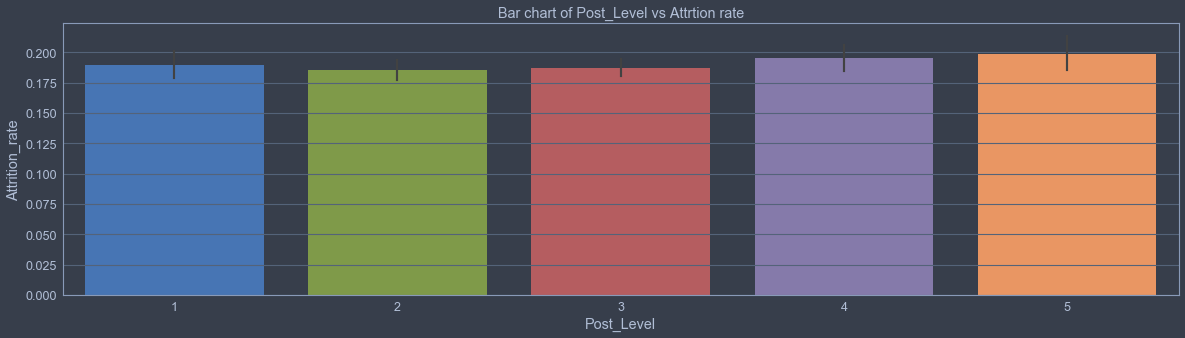

In [274]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='Post_Level',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of Post_Level vs Attrtion rate')
plt.show()

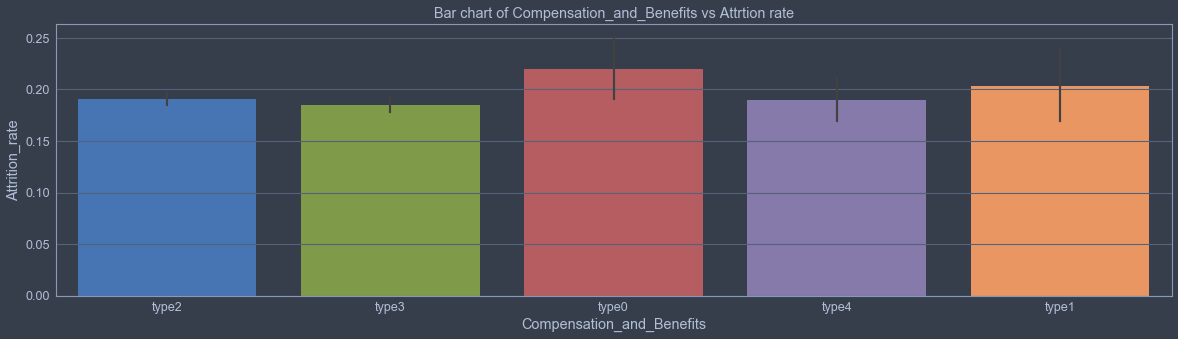

In [275]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='Compensation_and_Benefits',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of Compensation_and_Benefits vs Attrtion rate')
plt.show()

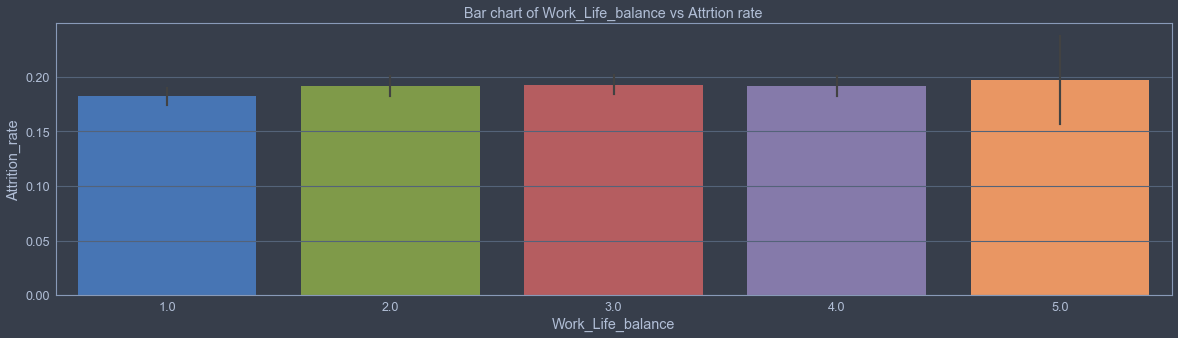

In [276]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='Work_Life_balance',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of Work_Life_balance vs Attrtion rate')
plt.show()

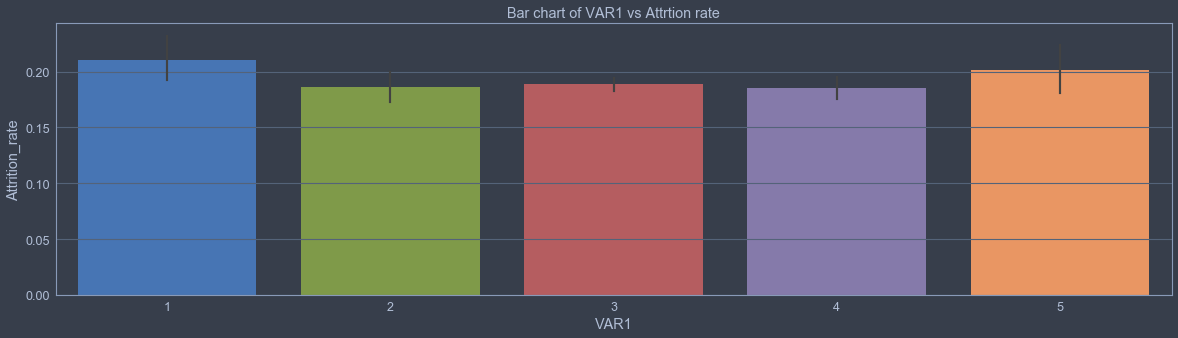

In [277]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='VAR1',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of VAR1 vs Attrtion rate')
plt.show()

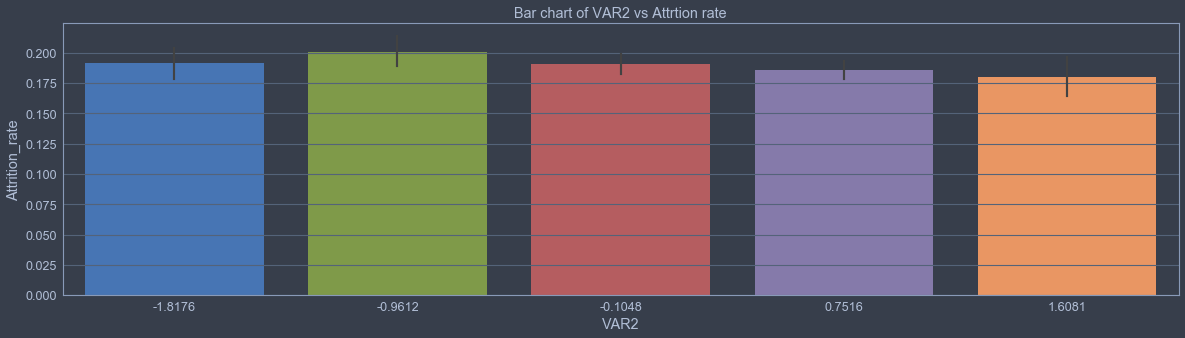

In [570]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='VAR2',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of VAR2 vs Attrtion rate')
plt.show()

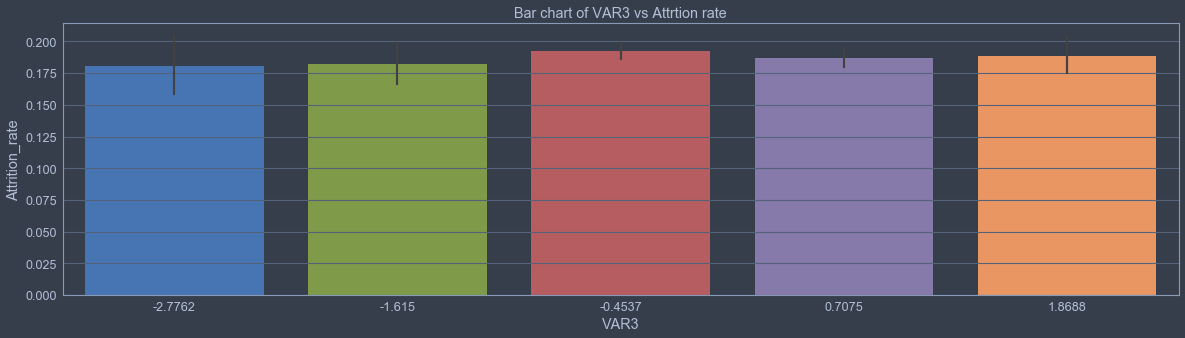

In [279]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='VAR3',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of VAR3 vs Attrtion rate')
plt.show()

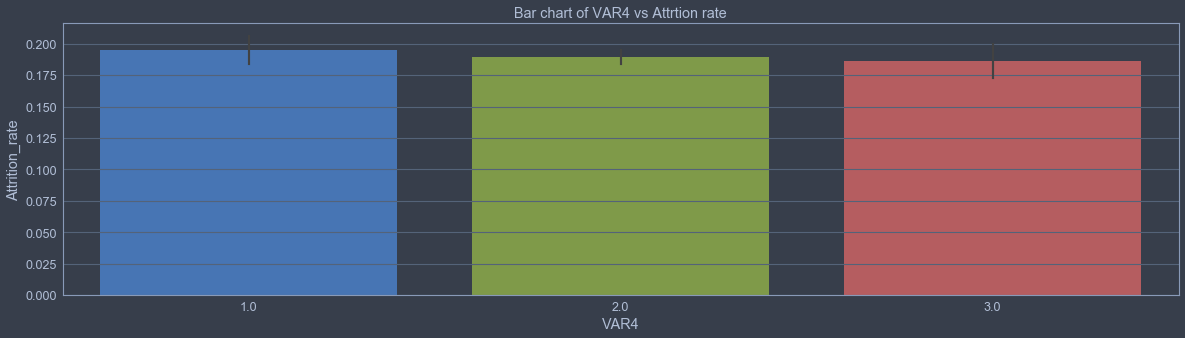

In [280]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='VAR4',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of VAR4 vs Attrtion rate')
plt.show()

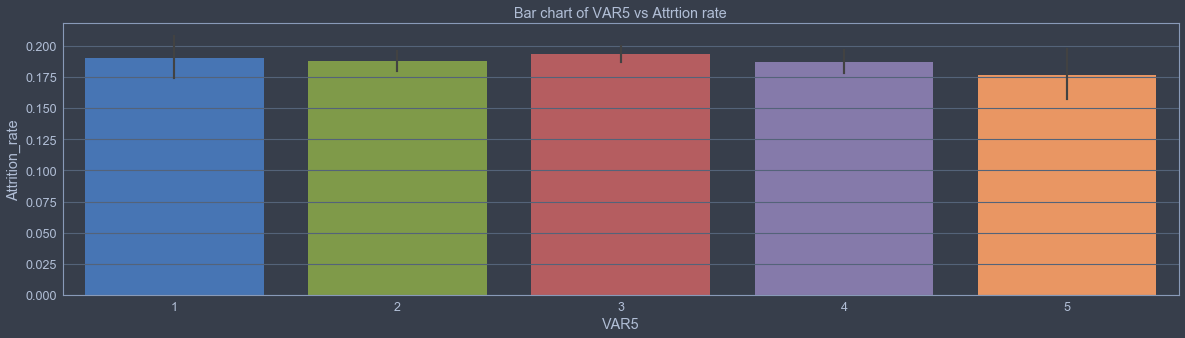

In [281]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='VAR5',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of VAR5 vs Attrtion rate')
plt.show()

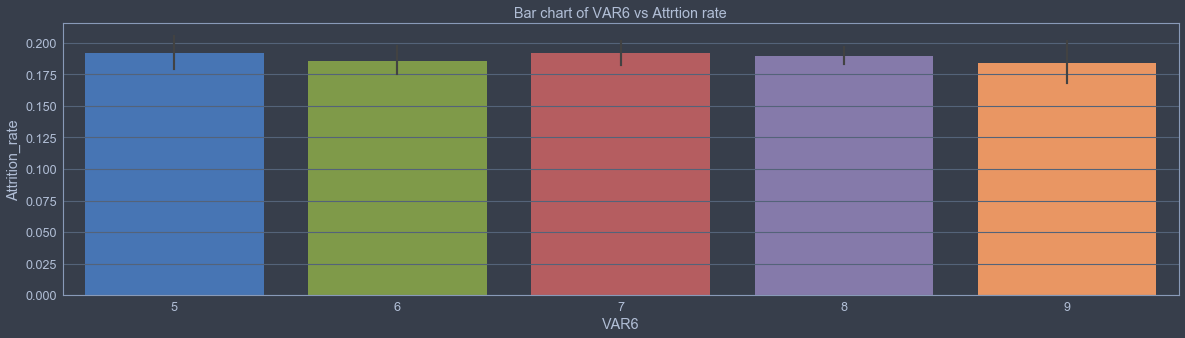

In [282]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='VAR6',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of VAR6 vs Attrtion rate')
plt.show()

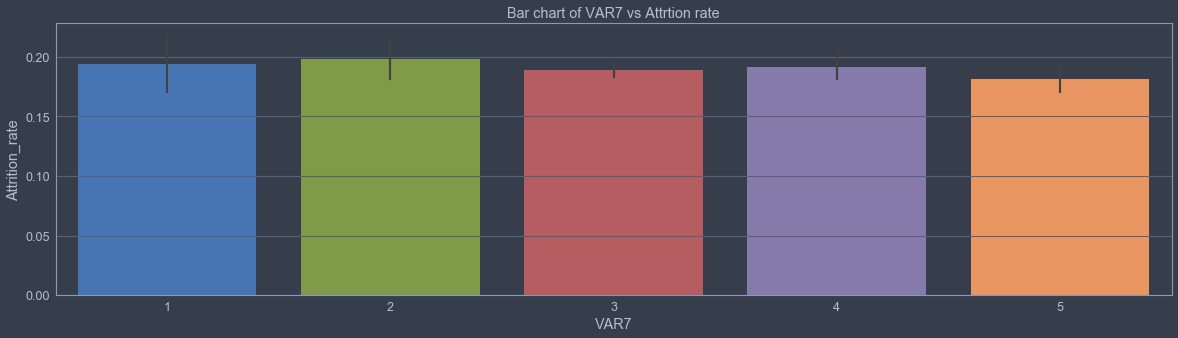

In [283]:
# Time_since_promotion
plt.figure(figsize=(20,5))
sbn.barplot(x='VAR7',y='Attrition_rate',data=train_init)
# plt.xticks(rotation = 60)
plt.title('Bar chart of VAR7 vs Attrtion rate')
plt.show()

## Feature engineering

In [48]:
test_init = pd.read_csv('test.csv')
final_submission=test_init['Employee_ID']

In [49]:
test_init.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [709]:
X_test_init=test_init.drop('Employee_ID',axis=1)
X_test_init.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [612]:
def find_features_with_null_values(dataframe):
    null_column_list=list()
    null_counts=dataframe.isnull().sum()
    for col,val in zip(dataframe.columns,null_counts):
        if val>0:
            null_column_list.append(col)
    return null_column_list

In [613]:
missing_values_cols_train=find_features_with_null_values(X_init)
print(len(missing_values_cols_train),' Columns: ',missing_values_cols_train)

6  Columns:  ['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']


In [714]:
missing_values_cols_test=find_features_with_null_values(X_test_init)
print(len(missing_values_cols_test),' Columns: ',missing_values_cols_test)

6  Columns:  ['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']


> We have six columns with missing values, we'll create models to predict these values. We'll do this after we have encoded all categorical models and scaled our numerical features.

In [715]:
cat_features=['Gender','Education_Level','Relationship_Status','Hometown','Unit','Decision_skill_possess','Time_since_promotion','Travel_Rate'
              ,'Post_Level','Pay_Scale','Compensation_and_Benefits','Work_Life_balance','VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
               'VAR7']
num_feats=[col for col in X_init.columns if col not in cat_features]
print(num_feats)

['Age', 'Time_of_service', 'growth_rate', 'Gender_F', 'Gender_M', 'Education_Level_1', 'Education_Level_2', 'Education_Level_3', 'Education_Level_4', 'Education_Level_5', 'Relationship_Status_Married', 'Relationship_Status_Single', 'Hometown_Clinton', 'Hometown_Franklin', 'Hometown_Lebanon', 'Hometown_Springfield', 'Hometown_Washington', 'Unit_Accounting and Finance', 'Unit_Human Resource Management', 'Unit_IT', 'Unit_Logistics', 'Unit_Marketing', 'Unit_Operarions', 'Unit_Production', 'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D', 'Unit_Sales', 'Unit_Security', 'Decision_skill_possess_Analytical', 'Decision_skill_possess_Behavioral', 'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive', 'Time_since_promotion_0', 'Time_since_promotion_1', 'Time_since_promotion_2', 'Time_since_promotion_3', 'Time_since_promotion_4', 'Travel_Rate_0', 'Travel_Rate_1', 'Travel_Rate_2', 'Post_Level_1', 'Post_Level_2', 'Post_Level_3', 'Post_Level_4', 'Post_Level_5', 'Compensation_and_Benefi

In [615]:
X_init.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'],
      dtype='object')

### Encoding categorical features

In [616]:
def encode_cat_feats(dataframe,cat_feats):
    dat = pd.get_dummies(dataframe,columns =cat_feats)
    return dat

In [617]:
train_alpha=encode_cat_feats(X_init,[col for col in cat_features if col not in missing_values_cols_train])

In [716]:
test_alpha=encode_cat_feats(X_test_init,[col for col in cat_features if col not in missing_values_cols_test])

In [619]:
train_alpha.describe()

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
count,6588.000000,6856.000000,7000.000000,6991.000000,6989.000000,6423.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,13.385064,47.064286,6.006294,2.387895,-0.008126,1.891078,0.587714,0.412286,0.099286,0.098714,0.411143,0.296571,0.094286,0.645714,0.354286,0.080714,0.217571,0.295714,0.248000,0.158000,0.070857,0.049143,0.199143,0.167571,0.030286,0.100857,0.030143,0.072000,0.027571,0.097143,0.134714,0.020571,0.250714,0.248000,0.250857,0.250429,0.023143,0.259857,0.258714,0.243286,0.215000,0.317714,0.546714,0.135571,0.147857,0.255143,0.347857,0.149429,0.099714,0.026714,0.019000,0.563571,0.340286,0.050429,0.050143,0.102286,0.599000,0.196000,0.052571,0.028286,0.071429,0.480429,0.332714,0.087143,0.069286,0.297857,0.39400,0.207143,0.031714,0.130000,0.167714,0.247714,0.380143,0.074429,0.041000,0.089571,0.560857,0.188571,0.120000
std,13.606920,10.364188,15.761406,2.058435,1.122786,0.989850,0.529403,0.492281,0.492281,0.299067,0.298299,0.492076,0.456779,0.292247,0.478330,0.478330,0.272415,0.412624,0.456396,0.431883,0.364767,0.256604,0.216182,0.399384,0.373512,0.171385,0.301161,0.170993,0.258506,0.163753,0.296173,0.341443,0.141955,0.433455,0.431883,0.433537,0.433291,0.150368,0.438587,0.437960,0.429097,0.410852,0.465621,0.497849,0.342357,0.354984,0.435973,0.476324,0.356536,0.299640,0.161259,0.136534,0.495978,0.473839,0.218843,0.218255,0.303045,0.490136,0.396997,0.223192,0.165800,0.257558,0.499653,0.471219,0.282064,0.253958,0.457349,0.48867,0.405288,0.175251,0.336327,0.373639,0.431716,0.485456,0.262486,0.198304,0.285587,0.496318,0.391196,0.324985
min,19.000000,0.000000,20.000000,1.000000,1.000000,-1.817600,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [717]:
test_alpha.describe()

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
count,2839.000000,2948.000000,3000.000000,2997.000000,2995.000000,2783.000000,2702.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,39.797816,13.403664,46.878000,6.060727,2.380968,0.027530,1.907476,0.576000,0.424000,0.094667,0.097000,0.395000,0.314000,0.099333,0.647000,0.353000,0.082333,0.219333,0.294333,0.249333,0.154667,0.06100,0.056333,0.189667,0.158333,0.035667,0.100667,0.02700,0.07000,0.032333,0.103667,0.148667,0.016667,0.248667,0.266333,0.240000,0.245000,0.020667,0.251667,0.256667,0.243667,0.227333,0.307667,0.557333,0.135000,0.160333,0.242667,0.344667,0.146667,0.105667,0.031000,0.021667,0.580333,0.321333,0.045667,0.053000,0.103333,0.610667,0.189667,0.043333,0.029333,0.069667,0.464000,0.344333,0.092667,0.067333,0.302667,0.389333,0.207667,0.033000,0.124333,0.157667,0.258333,0.382667,0.077000,0.041667,0.090667,0.564333,0.200333,0.10300
std,13.501754,10.189245,16.051947,2.096866,1.142826,0.999799,0.544526,0.494273,0.494273,0.292803,0.296007,0.488932,0.464194,0.299159,0.477982,0.477982,0.274918,0.413864,0.455818,0.432699,0.361647,0.23937,0.230603,0.392103,0.365114,0.185489,0.300937,0.16211,0.25519,0.176913,0.304878,0.355819,0.128040,0.432312,0.442114,0.427154,0.430159,0.142290,0.434043,0.436867,0.429365,0.419180,0.461605,0.496785,0.341781,0.366976,0.428767,0.475339,0.353832,0.307462,0.173347,0.145617,0.493587,0.467066,0.208796,0.224071,0.304444,0.487680,0.392103,0.203640,0.168767,0.254627,0.498785,0.475230,0.290013,0.250640,0.459489,0.487680,0.405704,0.178666,0.330016,0.364489,0.437791,0.486119,0.266636,0.199860,0.287182,0.495927,0.400317,0.30401
min,19.000000,0.000000,20.000000,1.000000,1.000000,-1.817600,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [620]:
print(train_alpha[num_feats])

       Age  Time_of_service  growth_rate
0     42.0              4.0           33
1     24.0              5.0           36
2     58.0             27.0           51
3     26.0              4.0           56
4     31.0              5.0           62
...    ...              ...          ...
6995  23.0              4.0           20
6996  44.0             16.0           59
6997  49.0             10.0           59
6998  47.0             24.0           21
6999  58.0             22.0           74

[7000 rows x 3 columns]


### Making predictive models to predict missing values

#### Age

In [621]:
def make_train_test_infer_split(dataframe,column,null_valued_columns):
    indexes=dataframe[column].isnull()
    infer_indices = [i for i,j in enumerate(indexes) if j==True]
    train_indices = [i for i,j in enumerate(indexes) if j != True]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    infer_data = dataframe.iloc[infer_indices].drop(null_valued_columns,axis=1)
    train_data = dataframe.iloc[train_indices].drop(null_valued_columns,axis=1)
    y_train=dataframe.iloc[train_indices,dataframe.columns.tolist().index(column)]
    
    return infer_data,train_data,y_train

In [622]:
infer_data_age,train_data_age,Y_train_age=make_train_test_infer_split(train_alpha,missing_values_cols_train[0],missing_values_cols_train)

In [629]:
from sklearn.metrics import r2_score,accuracy_score
def make_preds_for_infer(X_train,Y_train,infer,col):
# A parameter grid for XGBoost
    params = {'max_depth': [2,4,6,8,10],'n_estimators':[10,20,30,40,50,100]}    
#     params_class = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,4,6]}    
    X, X_Val, Y, Y_Val = train_test_split(X_train, Y_train)
    # Initialize XGB and GridSearch
    if col in cat_features:
        mod = xgb.XGBClassifier(nthread=-1)
    else:
        mod = xgb.XGBRegressor(nthread=-1)
#         grid = GridSearchCV(mod,params_reg)        

    grid = GridSearchCV(mod,params)
    grid.fit(X, Y)
    if col not in cat_features:
        print(r2_score(Y_Val, grid.best_estimator_.predict(X_Val)))
    else:
        print(accuracy_score(Y_Val,grid.best_estimator_.predict(X_Val)))
    # Save the file    
    return grid.best_estimator_.predict(infer)

In [627]:
pred_age=make_preds_for_infer(train_data_age,Y_train_age,infer_data_age,missing_values_cols_train[0])

0.049507819750264526


In [718]:
infer_data_age_test,train_data_age_test,Y_train_age_test=make_train_test_infer_split(test_alpha,missing_values_cols_test[0],missing_values_cols_test)

In [719]:
pred_age_test=make_preds_for_infer(train_data_age_test,Y_train_age_test,infer_data_age_test,missing_values_cols_test[0])

0.021470720527818177


In [720]:
infer_indices_age_test=[ind for ind,val in enumerate(test_alpha['Age'].isnull()) if val==True]

In [630]:
infer_indices_age=[ind for ind,val in enumerate(train_alpha['Age'].isnull()) if val==True]

In [722]:
test_alpha['Age'].isnull().sum()

161

In [631]:
train_alpha['Age'].isnull().sum()

412

In [723]:
for idx, val in tqdm(zip(infer_indices_age_test,pred_age_test)):
    test_alpha.iloc[idx,0]=val


0it [00:00, ?it/s]
161it [00:00, 1055.06it/s]


In [632]:
for idx, val in tqdm(zip(infer_indices_age,pred_age)):
    train_alpha.iloc[idx,0]=val


0it [00:00, ?it/s]
67it [00:00, 660.47it/s]
103it [00:00, 527.44it/s]
138it [00:00, 457.04it/s]
189it [00:00, 468.24it/s]
232it [00:00, 453.49it/s]
291it [00:00, 486.93it/s]
339it [00:00, 483.65it/s]
412it [00:00, 455.65it/s]


In [633]:
train_alpha['Age'].isnull().sum()

0

In [724]:
test_alpha['Age'].isnull().sum()

0

In [634]:
missing_values_cols_train.remove('Age')

In [725]:
missing_values_cols_test.remove('Age')

In [726]:
print(missing_values_cols_train)
# print(missing_values_cols)

[]


In [727]:
print(missing_values_cols_test)

['Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']


#### Time_of_service

In [636]:
infer_data_tos,train_data_tos,Y_train_tos=make_train_test_infer_split(train_alpha,missing_values_cols_train[0],missing_values_cols_train)

In [728]:
infer_data_tos_test,train_data_tos_test,Y_train_tos_test=make_train_test_infer_split(test_alpha,missing_values_cols_test[0],missing_values_cols_test)

In [637]:
pred_tos=make_preds_for_infer(train_data_tos,Y_train_tos,infer_data_tos,'Time_of_service')

0.8153716571639097


In [729]:
pred_tos_test=make_preds_for_infer(train_data_tos_test,Y_train_tos_test,infer_data_tos_test,missing_values_cols_test[0])

0.7927229111671446


In [638]:
train_alpha['Time_of_service'].isnull().sum()

144

In [730]:
test_alpha['Time_of_service'].isnull().sum()

52

In [639]:
infer_indices_tos=[ind for ind,val in enumerate(train_alpha['Time_of_service'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_tos,pred_tos)):
    train_alpha.iloc[idx,1]=val


0it [00:00, ?it/s]
87it [00:00, 859.91it/s]
144it [00:00, 651.87it/s]


In [731]:
infer_indices_tos_test=[ind for ind,val in enumerate(test_alpha['Time_of_service'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_tos_test,pred_tos_test)):
    test_alpha.iloc[idx,1]=val


52it [00:00, 1579.98it/s]


In [640]:
train_alpha['Time_of_service'].isnull().sum()

0

In [732]:
test_alpha['Time_of_service'].isnull().sum()

0

In [641]:
missing_values_cols_train.remove('Time_of_service')

In [733]:
missing_values_cols_test.remove('Time_of_service')

In [735]:
test_alpha.iloc[infer_indices_tos_test[:10]]

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
12,28.0,5.021634,57,10.0,3.0,0.7516,2.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
193,22.0,3.068991,26,8.0,1.0,-0.1048,2.0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
196,57.0,27.814089,23,8.0,5.0,-1.8176,2.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
210,43.0,13.080080,39,4.0,4.0,0.7516,3.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
212,64.0,32.015579,67,6.0,4.0,0.7516,2.0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
264,62.0,30.871059,31,3.0,2.0,0.7516,2.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
378,41.0,11.905846,28,5.0,3.0,-0.1048,2.0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
420,42.0,11.353287,73,9.0,1.0,-0.1048,3.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
493,21.0,2.420201,66,8.0,3.0,0.7516,2.0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
500,44.0,13.645881,46,5.0,1.0,0.7516,2.0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [645]:
train_alpha.iloc[infer_indices_tos]

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
27,28.0,4.871928,58,8.0,1.0,0.7516,2.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
57,24.0,5.499296,22,6.0,2.0,-1.8176,2.0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
96,22.0,2.860741,61,4.0,1.0,1.6081,NaN,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
104,25.0,5.456096,68,8.0,2.0,0.7516,2.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
197,40.0,12.684625,57,6.0,1.0,-0.9612,2.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,56.0,26.843193,62,5.0,3.0,0.7516,2.0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6809,52.0,21.229675,57,1.0,1.0,0.7516,2.0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
6843,28.0,4.797444,70,8.0,4.0,0.7516,2.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
6935,46.0,14.324987,45,6.0,1.0,0.7516,2.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


#### Pay_Scale

In [646]:
infer_data_ps,train_data_ps,Y_train_ps=make_train_test_infer_split(train_alpha,missing_values_cols_train[0],missing_values_cols_train)

In [736]:
infer_data_ps_test,train_data_ps_test,Y_train_ps_test=make_train_test_infer_split(test_alpha,missing_values_cols_test[0],missing_values_cols_test)

In [648]:
pred_ps=make_preds_for_infer(train_data_ps,Y_train_ps,infer_data_ps,'Pay_Scale')

0.20022883295194507


In [737]:
pred_ps_test=make_preds_for_infer(train_data_ps_test,Y_train_ps_test,infer_data_ps_test,'Pay_Scale')

0.19333333333333333


In [649]:
train_alpha['Pay_Scale'].isnull().sum()

9

In [739]:
test_alpha['Pay_Scale'].isnull().sum()

3

In [650]:
infer_indices_ps=[ind for ind,val in enumerate(train_alpha['Pay_Scale'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_ps,pred_ps)):
    train_alpha.iloc[idx,3]=val


9it [00:00, 113.55it/s]


In [740]:
infer_indices_ps_test=[ind for ind,val in enumerate(test_alpha['Pay_Scale'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_ps_test,pred_ps_test)):
    test_alpha.iloc[idx,3]=val


3it [00:00, 167.10it/s]


In [651]:
train_alpha['Pay_Scale'].isnull().sum()

0

In [741]:
test_alpha['Pay_Scale'].isnull().sum()

0

In [652]:
missing_values_cols_train.remove('Pay_Scale')

In [742]:
missing_values_cols_test.remove('Pay_Scale')

In [653]:
train_alpha.iloc[infer_indices_ps]

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
445,52.0,15.0,29,8.0,1.0,0.7516,3.0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1126,28.0,5.0,40,8.0,3.0,0.7516,1.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1378,21.0,2.0,39,8.0,NaN,NaN,2.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1997,35.0,12.0,38,6.0,3.0,-1.8176,2.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3083,23.0,4.0,66,8.0,3.0,-0.9612,2.0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3777,36.0,9.0,41,6.0,3.0,0.7516,2.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4508,33.0,5.0,27,6.0,2.0,-0.1048,1.0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
5958,52.0,16.0,26,8.0,4.0,0.7516,2.0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
6857,47.0,23.0,56,8.0,1.0,-0.1048,2.0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [743]:
test_alpha.iloc[infer_indices_ps_test]

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
1202,24.0,5.0,20,5.0,3.0,-0.9612,2.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1516,23.0,4.0,62,5.0,1.0,-0.1048,2.0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1979,30.0,8.0,26,8.0,2.0,NaN,3.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [654]:
print(missing_values_cols_train)

['Work_Life_balance', 'VAR2', 'VAR4']


#### Work_Life_balance

In [655]:
infer_data_wlb,train_data_wlb,Y_train_wlb=make_train_test_infer_split(train_alpha,missing_values_cols_train[0],missing_values_cols_train)

In [744]:
infer_data_wlb_test,train_data_wlb_test,Y_train_wlb_test=make_train_test_infer_split(test_alpha,missing_values_cols_test[0],missing_values_cols_test)

In [656]:
pred_wlb=make_preds_for_infer(train_data_wlb,Y_train_wlb,infer_data_wlb,'Work_Life_balance')

0.2911899313501144


In [745]:
pred_wlb_test=make_preds_for_infer(train_data_wlb_test,Y_train_wlb_test,infer_data_wlb_test,'Work_Life_balance')

0.2977303070761015


In [657]:
train_alpha['Work_Life_balance'].isnull().sum()

11

In [746]:
test_alpha['Work_Life_balance'].isnull().sum()

5

In [658]:
infer_indices_wlb=[ind for ind,val in enumerate(train_alpha['Work_Life_balance'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_wlb,pred_wlb)):
    train_alpha.iloc[idx,4]=val


11it [00:00, 220.58it/s]


In [747]:
infer_indices_wlb_test=[ind for ind,val in enumerate(test_alpha['Work_Life_balance'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_wlb_test,pred_wlb_test)):
    test_alpha.iloc[idx,4]=val


5it [00:00, 253.35it/s]


In [659]:
train_alpha['Work_Life_balance'].isnull().sum()

0

In [748]:
test_alpha['Work_Life_balance'].isnull().sum()

0

In [660]:
missing_values_cols_train.remove('Work_Life_balance')

In [749]:
missing_values_cols_test.remove('Work_Life_balance')

In [661]:
train_alpha.iloc[infer_indices_wlb]

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
728,35.0,9.20869,39,6.0,1.0,0.7516,2.0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
902,37.0,10.00000,21,7.0,1.0,1.6081,1.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1252,42.0,12.00000,22,9.0,1.0,0.7516,NaN,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1378,21.0,2.00000,39,8.0,3.0,NaN,2.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1634,43.0,14.00000,36,3.0,3.0,NaN,2.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2101,52.0,25.00000,24,8.0,3.0,0.7516,2.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2971,64.0,40.00000,46,10.0,1.0,1.6081,2.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3954,37.0,10.00000,71,8.0,3.0,1.6081,3.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4532,30.0,8.00000,59,2.0,3.0,-1.8176,2.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4735,29.0,6.00000,64,4.0,3.0,-0.9612,3.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [750]:
test_alpha.iloc[infer_indices_wlb_test]

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
47,44.0,14.0,28,5.0,3.0,-1.8176,2.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
374,28.0,5.0,23,9.0,1.0,-0.9612,2.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1104,45.0,12.0,46,9.0,1.0,-0.9612,2.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2452,45.0,22.0,63,10.0,1.0,-0.9612,2.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2739,24.0,5.0,52,9.0,1.0,-0.9612,2.0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [662]:
print(missing_values_cols_train)

['VAR2', 'VAR4']


#### VAR2

In [663]:
train_alpha['VAR2']=train_alpha['VAR2'].round(decimals=0)

In [751]:
test_alpha['VAR2']=test_alpha['VAR2'].round(decimals=0)

In [664]:
infer_data_v2,train_data_v2,Y_train_v2=make_train_test_infer_split(train_alpha,missing_values_cols_train[0],missing_values_cols_train)

In [752]:
infer_data_v2_test,train_data_v2_test,Y_train_v2_test=make_train_test_infer_split(test_alpha,missing_values_cols_test[0],missing_values_cols_test)

In [665]:
pred_v2=make_preds_for_infer(train_data_v2,Y_train_v2,infer_data_v2,'VAR2')

0.3804483188044832


In [753]:
pred_v2_test=make_preds_for_infer(train_data_v2_test,Y_train_v2_test,infer_data_v2_test,'VAR2')

0.38936781609195403


In [666]:
train_alpha['VAR2'].isnull().sum()

577

In [754]:
test_alpha['VAR2'].isnull().sum()

217

In [667]:
infer_indices_v2=[ind for ind,val in enumerate(train_alpha['VAR2'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_v2,pred_v2)):
    train_alpha.iloc[idx,5]=val


0it [00:00, ?it/s]
43it [00:00, 368.50it/s]
88it [00:00, 387.93it/s]
134it [00:00, 406.27it/s]
182it [00:00, 425.07it/s]
229it [00:00, 424.92it/s]
280it [00:00, 446.44it/s]
328it [00:00, 455.06it/s]
378it [00:00, 466.71it/s]
437it [00:00, 492.05it/s]
577it [00:01, 514.26it/s]


In [755]:
infer_indices_v2_test=[ind for ind,val in enumerate(test_alpha['VAR2'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_v2_test,pred_v2_test)):
    test_alpha.iloc[idx,5]=val


0it [00:00, ?it/s]
88it [00:00, 873.60it/s]
217it [00:00, 781.13it/s]


In [668]:
train_alpha['VAR2'].isnull().sum()

0

In [756]:
test_alpha['VAR2'].isnull().sum()

0

In [669]:
missing_values_cols_train.remove('VAR2')

In [757]:
missing_values_cols_test.remove('VAR2')

In [670]:
train_alpha['VAR2'].value_counts()

 1.0    3033
-0.0    1631
-1.0    1047
-2.0     816
 2.0     473
Name: VAR2, dtype: int64

In [759]:
test_alpha['VAR2'].value_counts()

 1.0    1337
-0.0     663
-1.0     422
-2.0     357
 2.0     221
Name: VAR2, dtype: int64

#### VAR4

In [671]:
infer_data_v4,train_data_v4,Y_train_v4=make_train_test_infer_split(train_alpha,missing_values_cols_train[0],missing_values_cols_train)

In [760]:
infer_data_v4_test,train_data_v4_test,Y_train_v4_test=make_train_test_infer_split(test_alpha,missing_values_cols_test[0],missing_values_cols_test)

In [672]:
pred_v4=make_preds_for_infer(train_data_v4,Y_train_v4,infer_data_v4,'VAR4')

0.7118537200504413


In [761]:
pred_v4_test=make_preds_for_infer(train_data_v4_test,Y_train_v4_test,infer_data_v4_test,'VAR4')

0.7071005917159763


In [673]:
train_alpha['VAR4'].isnull().sum()

656

In [763]:
test_alpha['VAR4'].isnull().sum()

298

In [674]:
infer_indices_v4=[ind for ind,val in enumerate(train_alpha['VAR4'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_v4,pred_v4)):
    train_alpha.iloc[idx,6]=val


0it [00:00, ?it/s]
61it [00:00, 605.57it/s]
143it [00:00, 655.97it/s]
300it [00:00, 793.90it/s]
428it [00:00, 894.61it/s]
656it [00:00, 1101.76it/s][A


In [764]:
infer_indices_v4_test=[ind for ind,val in enumerate(test_alpha['VAR4'].isnull()) if val==True]
for idx, val in tqdm(zip(infer_indices_v4_test,pred_v4_test)):
    test_alpha.iloc[idx,6]=val


0it [00:00, ?it/s]
96it [00:00, 951.17it/s]
174it [00:00, 890.21it/s]
246it [00:00, 828.39it/s]
298it [00:00, 704.01it/s]


In [675]:
train_alpha['VAR4'].isnull().sum()

0

In [765]:
test_alpha['VAR4'].isnull().sum()

0

In [676]:
missing_values_cols_train.remove('VAR4')

In [766]:
missing_values_cols_test.remove('VAR4')

In [677]:
train_alpha['VAR4'].value_counts()

2.0    5147
1.0    1272
3.0     581
Name: VAR4, dtype: int64

In [767]:
test_alpha['VAR4'].value_counts()

2.0    2175
1.0     538
3.0     287
Name: VAR4, dtype: int64

In [678]:
train_alpha.head()

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
0,42.0,4.0,33,7.0,3.0,1.0,2.0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,24.0,5.0,36,6.0,4.0,-1.0,2.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,58.0,27.0,51,8.0,1.0,-1.0,3.0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,26.0,4.0,56,8.0,1.0,-2.0,2.0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,31.0,5.0,62,2.0,3.0,1.0,2.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [768]:
train_alpha.head()

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
0,3.761200,1.609438,3.526361,7.0,3.0,1.0,2.0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,3.218876,1.791759,3.610918,6.0,4.0,-1.0,2.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,4.077537,3.332205,3.951244,8.0,1.0,-1.0,3.0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,3.295837,1.609438,4.043051,8.0,1.0,-2.0,2.0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,3.465736,1.791759,4.143135,2.0,3.0,1.0,2.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


### Scale numerical features

In [679]:
def scale_num_features(dataframe,num_feats):
    dataframe[num_feats]=np.log1p(dataframe[num_feats])
    return dataframe

In [680]:
X_init = scale_num_features(train_alpha,num_feats)
X_init.head()

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
0,3.761200,1.609438,3.526361,7.0,3.0,1.0,2.0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,3.218876,1.791759,3.610918,6.0,4.0,-1.0,2.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,4.077537,3.332205,3.951244,8.0,1.0,-1.0,3.0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,3.295837,1.609438,4.043051,8.0,1.0,-2.0,2.0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,3.465736,1.791759,4.143135,2.0,3.0,1.0,2.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [769]:
X_test_init = scale_num_features(test_alpha,['Age','Time_of_service','growth_rate'])
X_test_init.head()

,Age,Time_of_service,growth_rate,Pay_Scale,Work_Life_balance,VAR2,VAR4,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
0,3.496508,2.079442,3.433987,4.0,1.0,-1.0,2.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,4.189655,3.737670,4.290459,1.0,1.0,-1.0,1.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,3.970292,3.091042,3.258097,8.0,1.0,-0.0,2.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,3.931826,2.484907,3.367296,2.0,4.0,-0.0,2.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,3.806662,2.564949,3.871201,2.0,4.0,2.0,2.0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [684]:
X_init_final=encode_cat_feats(X_init,['Pay_Scale','Work_Life_balance','VAR2','VAR4'])
X_init_final.head()

,Age,Time_of_service,growth_rate,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5,Pay_Scale_1.0,Pay_Scale_2.0,Pay_Scale_3.0,Pay_Scale_4.0,Pay_Scale_5.0,Pay_Scale_6.0,Pay_Scale_7.0,Pay_Scale_8.0,Pay_Scale_9.0,Pay_Scale_10.0,Work_Life_balance_1.0,Work_Life_balance_2.0,Work_Life_balance_3.0,Work_Life_balance_4.0,Work_Life_balance_5.0,VAR2_-2.0,VAR2_-1.0,VAR2_-0.0,VAR2_1.0,VAR2_2.0,VAR4_1.0,VAR4_2.0,VAR4_3.0
0,3.761200,1.609438,3.526361,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,3.218876,1.791759,3.610918,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,4.077537,3.332205,3.951244,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,3.295837,1.609438,4.043051,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,3.465736,1.791759,4.143135,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [770]:
X_init_test_final=encode_cat_feats(X_test_init,['Pay_Scale','Work_Life_balance','VAR2','VAR4'])
X_init_test_final.head()

,Age,Time_of_service,growth_rate,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5,Pay_Scale_1.0,Pay_Scale_2.0,Pay_Scale_3.0,Pay_Scale_4.0,Pay_Scale_5.0,Pay_Scale_6.0,Pay_Scale_7.0,Pay_Scale_8.0,Pay_Scale_9.0,Pay_Scale_10.0,Work_Life_balance_1.0,Work_Life_balance_2.0,Work_Life_balance_3.0,Work_Life_balance_4.0,Work_Life_balance_5.0,VAR2_-2.0,VAR2_-1.0,VAR2_-0.0,VAR2_1.0,VAR2_2.0,VAR4_1.0,VAR4_2.0,VAR4_3.0
0,3.496508,2.079442,3.433987,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,4.189655,3.737670,4.290459,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,3.970292,3.091042,3.258097,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,3.931826,2.484907,3.367296,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,3.806662,2.564949,3.871201,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [772]:
X_init_final.shape

(7000, 99)

In [773]:
X_init_test_final.shape

(3000, 99)

***

### Modelling on final data

#### Base model

In [59]:
from sklearn.metrics import mean_squared_error,make_scorer
def rmse(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred , squared=False)    
    return 100*max(0,(1-rmse))

In [30]:
from sklearn.model_selection import RandomizedSearchCV
base_reg_params = {'max_depth':[1,5,10,20,30,40,50,60],'min_samples_split':[i for i in range(400,450)]}
score_base = make_scorer(rmse, greater_is_better=True)
base_reg=DecisionTreeRegressor()
reg_cv_base = RandomizedSearchCV(base_reg,base_reg_params,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)
reg_cv_base.fit(X_init_final,Y_init)
results=pd.DataFrame.from_dict(reg_cv_base.cv_results_)

In [35]:
np.argsort(reg_cv_base.best_estimator_.feature_importances_)[::-1]

array([ 1, 98, 36, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 24, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 25, 23, 48, 11,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 12, 22, 13, 14, 15, 16, 17, 18, 19, 20, 21, 47, 49, 97,
       74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93, 94, 95, 96, 75, 73, 50, 72, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,  0],
      dtype=int64)

In [939]:
results=results.sort_values(['rank_test_score'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.089984,0.024010,0.005458,0.000916,439,1,"{'min_samples_split': 439, 'max_depth': 1}",81.939184,82.021920,81.268916,81.719166,80.081265,81.406090,0.712100,1,81.309585,81.288672,81.471974,81.359526,81.772522,81.440456,0.177751
6,0.095612,0.026834,0.007702,0.002555,409,1,"{'min_samples_split': 409, 'max_depth': 1}",81.939184,82.021920,81.268916,81.719166,80.081265,81.406090,0.712100,1,81.309585,81.288672,81.471974,81.359526,81.772522,81.440456,0.177751
3,0.225234,0.019519,0.022030,0.018330,442,20,"{'min_samples_split': 442, 'max_depth': 20}",81.551249,81.665682,81.020324,81.410317,79.926222,81.114759,0.632919,3,81.609021,81.555491,81.759659,81.620783,81.975088,81.704008,0.151385
5,0.243712,0.056260,0.010671,0.002412,442,60,"{'min_samples_split': 442, 'max_depth': 60}",81.551249,81.665682,81.020324,81.410317,79.926222,81.114759,0.632919,3,81.609021,81.555491,81.759659,81.620783,81.975088,81.704008,0.151385
9,0.211054,0.017883,0.008486,0.002644,439,60,"{'min_samples_split': 439, 'max_depth': 60}",81.543213,81.665682,81.020324,81.410317,79.926222,81.113151,0.631818,5,81.618060,81.555491,81.759659,81.620783,81.975088,81.705816,0.150290


In [932]:
# passing best param values to classifier as found by cross validation.
mDT_best=DecisionTreeRegressor(max_depth=1,min_samples_split=415)
# training the model.
mDT_best.fit(X_init_final,Y_init)
# using the trained model.
Y_test_pred=mDT_best.predict(X_init_test_final)

***

In [933]:
test_base_attrition_rate = pd.Series(Y_test_pred, name = "Attrition_rate").astype(float)
results = pd.concat([final_submission, test_base_attrition_rate],axis = 1)

In [934]:
results.to_csv("alpha_1.csv", index = False)

In [935]:
results.shape

(3000, 2)

In [936]:
results.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.194016
1,EID_9658,0.182664
2,EID_22203,0.182664
3,EID_7652,0.194016
4,EID_6516,0.194016


### XGBoost modelling

In [909]:
# A parameter grid for XGBoost
xgb_reg_params = {'max_depth': [1,2,3,4,5,6,7,8,9,10],'n_estimators':[10,100,1000,2000]}    
xgb_reg=xgb.XGBRegressor(nthread=-1)
xgb_reg_cv = RandomizedSearchCV(xgb_reg,xgb_reg_params,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)
xgb_reg_cv.fit(X_init_final,Y_init)
results_xgb=pd.DataFrame.from_dict(xgb_reg_cv.cv_results_)

In [910]:
results_xgb=results_xgb.sort_values(['rank_test_score'])
results_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,9.598803,0.218231,0.052362,0.014920,100,3,"{'n_estimators': 100, 'max_depth': 3}",81.532719,81.231411,80.850946,81.039262,79.821533,80.895174,0.582227,1,83.499280,83.594333,83.576232,83.615484,83.834241,83.623914,0.112242
4,2.634793,0.050555,0.045283,0.019846,10,9,"{'n_estimators': 10, 'max_depth': 9}",80.869602,80.830405,80.609242,80.758158,79.318237,80.477129,0.586225,2,87.981926,88.109205,87.789248,88.064675,87.814188,87.951848,0.129449
5,150.882973,5.230019,0.286997,0.114858,2000,2,"{'n_estimators': 2000, 'max_depth': 2}",80.451936,80.338889,80.059621,79.892351,78.701613,79.888882,0.625829,3,85.785077,85.733139,85.843472,85.896449,86.146032,85.880834,0.143494
1,142.828081,6.418813,0.225779,0.061659,2000,9,"{'n_estimators': 2000, 'max_depth': 9}",80.103630,80.106868,79.920502,79.961737,78.390916,79.696731,0.657151,4,99.832844,99.820316,99.845332,99.832523,99.850413,99.836286,0.010606
6,23.231102,1.751183,0.082591,0.019253,100,8,"{'n_estimators': 100, 'max_depth': 8}",80.034324,79.511005,79.478272,79.148002,78.553187,79.344958,0.487086,5,98.299800,98.370905,98.040918,98.294137,98.507106,98.302573,0.151687


In [865]:
def modelfit(alg, X,Y,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X, label=Y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X, Y,eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
#     dtrain_predprob = alg.predict(X)[:,1]
        
    #Print model report:
    print('\nModel Report')
#     print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
#     print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
xgb_reg_1 = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb_reg_1, X_init_final,Y_init)

In [868]:
xgb_param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
xgb_reg_cv = RandomizedSearchCV(xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),xgb_param_test1,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)

xgb_reg_cv.fit(X_init_final,Y_init)
results_xgb_params_1=pd.DataFrame.from_dict(xgb_reg_cv.cv_results_)

In [869]:
results_xgb_params_1=results_xgb_params_1.sort_values(['rank_test_score'])
results_xgb_params_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,6.214015,0.172316,0.030719,0.008658,1,3,"{'min_child_weight': 1, 'max_depth': 3}",81.779648,81.741592,81.211965,81.449899,79.983218,81.233265,0.658321,1,82.609366,82.648681,82.734466,82.701697,82.998514,82.738545,0.136909
6,6.590013,0.820590,0.028324,0.003710,5,3,"{'min_child_weight': 5, 'max_depth': 3}",81.758035,81.689352,81.158905,81.428057,79.986238,81.204118,0.644624,2,82.580303,82.612518,82.708694,82.669857,82.992390,82.712753,0.146727
5,10.409021,0.259803,0.030120,0.003302,5,5,"{'min_child_weight': 5, 'max_depth': 5}",81.426141,81.302310,81.007978,81.054679,79.722931,80.902808,0.609871,3,85.970568,85.935547,86.010673,86.041813,86.313982,86.054517,0.134616
3,10.167067,1.092361,0.040294,0.009369,1,5,"{'min_child_weight': 1, 'max_depth': 5}",81.362859,81.240531,81.007687,81.120023,79.696393,80.885499,0.606271,4,86.380907,86.426062,86.416673,86.474374,86.597611,86.459125,0.075398
7,18.163527,2.208051,0.036104,0.007762,3,7,"{'min_child_weight': 3, 'max_depth': 7}",81.019318,80.860138,80.631960,80.733854,79.524785,80.554011,0.530650,5,91.662678,91.619182,91.444265,91.889143,91.796915,91.682436,0.152938


In [903]:
xgb_param_test2 = {
 'max_depth':[2,3,4,5,6,7,8,9,],
 'min_child_weight':[1,2,3,4,5]
}
xgb_reg_cv = RandomizedSearchCV(xgb.XGBRegressor( learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),xgb_param_test2,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)

xgb_reg_cv.fit(X_init_final,Y_init)
results_xgb_params_2=pd.DataFrame.from_dict(xgb_reg_cv.cv_results_)

results_xgb_params_2=results_xgb_params_2.sort_values(['rank_test_score'])
results_xgb_params_2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,23.955503,1.219893,0.059046,0.019528,3,2,"{'min_child_weight': 3, 'max_depth': 2}",81.761219,81.638244,81.143400,81.378405,79.996721,81.183598,0.630649,1,82.469983,82.516402,82.605705,82.567225,82.906156,82.613094,0.153541
5,33.357551,3.745382,0.049470,0.004746,1,3,"{'min_child_weight': 1, 'max_depth': 3}",81.411765,81.227770,80.846626,81.053103,79.792331,80.866319,0.568662,2,84.666042,84.752502,84.793452,84.749042,85.067311,84.805670,0.137211
2,37.534439,5.084781,0.059045,0.020686,2,4,"{'min_child_weight': 2, 'max_depth': 4}",80.850008,80.616073,80.394829,80.685377,79.434925,80.396242,0.502387,3,88.256955,88.301385,88.311213,88.289213,88.474248,88.326603,0.076054
8,40.845708,4.646801,0.195285,0.262497,1,4,"{'min_child_weight': 1, 'max_depth': 4}",80.865855,80.588256,80.471665,80.664171,79.347154,80.387420,0.535738,4,88.255921,88.323472,88.285148,88.289767,88.556897,88.342241,0.109447
3,127.138978,20.380074,0.169554,0.044671,1,8,"{'min_child_weight': 1, 'max_depth': 8}",80.717492,80.625465,80.110039,80.402732,79.229902,80.217126,0.536216,5,99.716209,99.697574,99.714587,99.710894,99.706966,99.709246,0.006650


In [871]:
xgb_param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
xgb_reg_cv = RandomizedSearchCV(xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),xgb_param_test3,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)

xgb_reg_cv.fit(X_init_final,Y_init)
results_xgb_params_3=pd.DataFrame.from_dict(xgb_reg_cv.cv_results_)

results_xgb_params_3=results_xgb_params_3.sort_values(['rank_test_score'])
results_xgb_params_3.head()

C:\Users\srivasum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,5.429506,1.586289,0.032114,0.009214,0.4,{'gamma': 0.4},81.956347,82.020121,81.288365,81.714643,80.129138,81.421723,0.695452,1,81.370341,81.332664,81.517798,81.429184,81.796052,81.489208,0.165655
3,6.556699,0.152108,0.039295,0.007792,0.3,{'gamma': 0.3},81.953151,82.015144,81.288890,81.705051,80.127169,81.417881,0.694014,2,81.428552,81.396425,81.578728,81.520112,81.871938,81.559151,0.169280
2,6.671594,0.078186,0.044482,0.013596,0.2,{'gamma': 0.2},81.949213,81.952704,81.273145,81.638110,80.127225,81.388079,0.678108,3,81.605713,81.626565,81.727777,81.720644,82.038789,81.743898,0.155321
1,6.677179,0.121395,0.050465,0.014169,0.1,{'gamma': 0.1},81.923270,81.886059,81.231802,81.591984,80.077774,81.342178,0.679232,4,81.748365,81.770318,81.931217,81.857241,82.215559,81.904540,0.168575
0,8.056099,0.595041,0.061636,0.022170,0,{'gamma': 0.0},81.915968,81.860988,81.208240,81.626459,80.091516,81.340634,0.672502,5,81.772216,81.803051,81.946374,81.871831,82.234267,81.925548,0.165616


In [873]:
xgb_param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

xgb_reg_cv = RandomizedSearchCV(xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=1, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),xgb_param_test4,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)

xgb_reg_cv.fit(X_init_final,Y_init)
results_xgb_params_4=pd.DataFrame.from_dict(xgb_reg_cv.cv_results_)

results_xgb_params_4=results_xgb_params_4.sort_values(['rank_test_score'])
results_xgb_params_4.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,7.207562,0.852385,0.058644,0.036527,0.9,0.8,"{'subsample': 0.9, 'colsample_bytree': 0.8}",81.943987,82.038741,81.295352,81.739151,80.130143,81.429475,0.698295,1,81.314070,81.315083,81.495416,81.399265,81.772786,81.459324,0.170336
3,6.239745,1.287236,0.049270,0.020773,0.9,0.6,"{'subsample': 0.9, 'colsample_bytree': 0.6}",81.941581,82.023388,81.295396,81.751654,80.130143,81.428432,0.696422,2,81.318943,81.324654,81.496345,81.387173,81.772786,81.459980,0.168923
2,8.578501,0.625037,0.073006,0.057381,0.8,0.9,"{'subsample': 0.8, 'colsample_bytree': 0.9}",81.954931,82.028157,81.291894,81.705572,80.140134,81.424137,0.691656,3,81.374503,81.330503,81.523461,81.434270,81.811225,81.494793,0.170924
5,6.277644,0.132221,0.040892,0.007384,0.8,0.8,"{'subsample': 0.8, 'colsample_bytree': 0.8}",81.956347,82.020121,81.288365,81.714643,80.129138,81.421723,0.695452,4,81.370341,81.332664,81.517798,81.429184,81.796052,81.489208,0.165655
1,8.739476,0.758204,0.051461,0.032195,0.7,0.7,"{'subsample': 0.7, 'colsample_bytree': 0.7}",81.932368,82.003247,81.292648,81.708204,80.143872,81.416068,0.682701,5,81.385175,81.363729,81.534729,81.431799,81.810405,81.505167,0.163603


In [874]:
xgb_param_test5 = {
    'subsample':[i/100.0 for i in range(75,90,5)],
    'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

xgb_reg_cv = RandomizedSearchCV(xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=1, gamma=0.4, subsample=0.9, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27),xgb_param_test5,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)

xgb_reg_cv.fit(X_init_final,Y_init)
results_xgb_params_5=pd.DataFrame.from_dict(xgb_reg_cv.cv_results_)

results_xgb_params_5=results_xgb_params_5.sort_values(['rank_test_score'])
results_xgb_params_5.head()

C:\Users\srivasum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,5.622990,1.713643,0.031719,0.007574,0.85,0.85,"{'subsample': 0.85, 'colsample_bytree': 0.85}",81.947360,82.017264,81.288473,81.733333,80.133844,81.424055,0.693459,1,81.326775,81.326916,81.507297,81.403472,81.788522,81.470596,0.172196
7,6.604171,0.059545,0.046875,0.010944,0.8,0.85,"{'subsample': 0.8, 'colsample_bytree': 0.85}",81.957965,82.019738,81.291894,81.705572,80.140134,81.423060,0.690661,2,81.375842,81.334589,81.523461,81.434270,81.811225,81.495878,0.169955
1,6.373588,0.232375,0.062035,0.024723,0.8,0.75,"{'subsample': 0.8, 'colsample_bytree': 0.75}",81.957347,82.020237,81.288365,81.716626,80.131892,81.422893,0.694769,3,81.364903,81.323072,81.517798,81.436282,81.799213,81.488254,0.168979
4,7.600912,0.058670,0.052461,0.014043,0.8,0.8,"{'subsample': 0.8, 'colsample_bytree': 0.8}",81.956347,82.020121,81.288365,81.714643,80.129138,81.421723,0.695452,4,81.370341,81.332664,81.517798,81.429184,81.796052,81.489208,0.165655
5,7.656963,0.230650,0.049669,0.010898,0.85,0.8,"{'subsample': 0.85, 'colsample_bytree': 0.8}",81.948773,82.014669,81.284767,81.728470,80.131732,81.421682,0.693728,5,81.336891,81.331893,81.495773,81.409202,81.778578,81.470467,0.165150


In [940]:
parameters_final_tune_xgb = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

xgb_reg_cv_final = RandomizedSearchCV(xgb.XGBRegressor(objective= 'reg:squarederror', nthread=-1),parameters_final_tune_xgb,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)

xgb_reg_cv_final.fit(X_init_final,Y_init)
results_xgb_params_final=pd.DataFrame.from_dict(xgb_reg_cv_final.cv_results_)

results_xgb_params_final=results_xgb_params_final.sort_values(['rank_test_score'])
results_xgb_params_final.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,7.830978,1.838305,0.049427,0.029231,0.5,100,3,2,0.1,2,0.6,"{'subsample': 0.5, 'n_estimators': 100, 'min_c...",81.952643,82.032964,81.285384,81.768191,80.135473,81.434931,0.699669,1,81.296641,81.276118,81.460967,81.341154,81.762013,81.427379,0.179173
2,67.999568,0.862582,0.188209,0.022416,0.6,1000,3,2,0.01,0.01,0.6,"{'subsample': 0.6, 'n_estimators': 1000, 'min_...",81.943124,81.906804,81.271402,81.625237,80.100755,81.369464,0.678598,2,81.669265,81.690298,81.851832,81.755190,82.137395,81.820796,0.170583
0,33.371186,2.246770,0.061743,0.016433,0.7,250,5,4,0.01,0.3,0.6,"{'subsample': 0.7, 'n_estimators': 250, 'min_c...",81.748770,81.700884,81.195761,81.471261,80.110956,81.245527,0.600215,3,81.434089,81.428681,81.548704,81.492808,81.836711,81.548199,0.150741


In [918]:
xgb_final_mod = xgb.XGBRegressor(n_estimators=500, max_depth=4,learning_rate=0.1,
 min_child_weight=3, gamma=0.4, subsample=0.2,reg_lambda=1.5,reg_alpha=0, colsample_bytree=0.6, nthread=-1)
# xgb_final_mod = xgb.XGBRegressor(n_estimators=500,max_depth=2)
xgb_final_mod.fit(X_init_final,Y_init)
Y_test_pred_xgb = xgb_final_mod.predict(X_init_test_final)

test_xgb_attrition_rate = pd.Series(Y_test_pred_xgb, name = "Attrition_rate").astype(float)
results_xgb = pd.concat([final_submission, test_xgb_attrition_rate],axis = 1)

results_xgb.to_csv("beta.csv", index = False)

In [919]:
results_xgb.shape

(3000, 2)

In [920]:
results_xgb.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.298459
1,EID_9658,0.268201
2,EID_22203,0.168616
3,EID_7652,0.192623
4,EID_6516,0.189046


### LightGBM

In [911]:
X_init_final.to_csv('final_data.csv',index=False)

In [912]:
X_init_test_final.head()

,Age,Time_of_service,growth_rate,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5,Pay_Scale_1.0,Pay_Scale_2.0,Pay_Scale_3.0,Pay_Scale_4.0,Pay_Scale_5.0,Pay_Scale_6.0,Pay_Scale_7.0,Pay_Scale_8.0,Pay_Scale_9.0,Pay_Scale_10.0,Work_Life_balance_1.0,Work_Life_balance_2.0,Work_Life_balance_3.0,Work_Life_balance_4.0,Work_Life_balance_5.0,VAR2_-2.0,VAR2_-1.0,VAR2_-0.0,VAR2_1.0,VAR2_2.0,VAR4_1.0,VAR4_2.0,VAR4_3.0
0,3.496508,2.079442,3.433987,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,4.189655,3.737670,4.290459,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,3.970292,3.091042,3.258097,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,3.931826,2.484907,3.367296,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,3.806662,2.564949,3.871201,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [914]:
X_init_test_final.to_csv('final_test_data.csv',index=False)

***
### Random Forest

In [956]:
from sklearn.ensemble import RandomForestRegressor

parameters_final_tune_rf = {"max_depth": [2, 4, 6, 8, 10],
               "min_samples_split": [1, 2, 3, 4, 5],
               "n_estimators": [100, 250, 500, 1000]}

rf_reg_cv = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),parameters_final_tune_rf,cv=7,scoring=score_base,n_jobs=-1,return_train_score=True)

rf_reg_cv.fit(X_init_final,Y_init)
results_rf_params_cv=pd.DataFrame.from_dict(rf_reg_cv.cv_results_)

results_xgb_params_final=results_rf_params_cv.sort_values(['rank_test_score'])
results_xgb_params_final.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
4,8.497976,1.870032,1.332435,0.602179,500,3,2,"{'n_estimators': 500, 'min_samples_split': 3, ...",81.952131,82.508583,81.537101,80.563130,82.375278,80.575763,80.515744,81.432533,0.815737,1,81.405474,81.319548,81.471481,81.643537,81.343767,81.639753,81.646039,81.495657,0.135251
9,18.949585,1.706286,1.425331,0.925351,500,2,4,"{'n_estimators': 500, 'min_samples_split': 2, ...",81.946178,82.504154,81.532433,80.583606,82.355318,80.563708,80.523678,81.429868,0.808457,2,81.702547,81.606484,81.762131,81.925560,81.640770,81.918642,81.937214,81.784764,0.131354
5,2.065898,0.629166,0.711384,0.475171,100,3,2,"{'n_estimators': 100, 'min_samples_split': 3, ...",81.953772,82.498188,81.527654,80.558425,82.375451,80.571827,80.520745,81.429437,0.814303,3,81.404348,81.318351,81.469053,81.642971,81.344922,81.639677,81.646292,81.495088,0.135402


In [953]:
from sklearn.ensemble import RandomForestRegressor
parameters_final_tune_rf_1 = {"n_estimators": range(51)}

rf_reg_cv_1 = RandomizedSearchCV(RandomForestRegressor(min_samples_split=3,max_depth=1,n_jobs=-1),parameters_final_tune_rf_1,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)

rf_reg_cv_1.fit(X_init_final,Y_init)
results_rf_params_cv_1=pd.DataFrame.from_dict(rf_reg_cv_1.cv_results_)

results_xgb_params_final_1=results_rf_params_cv_1.sort_values(['rank_test_score'])
results_xgb_params_final_1.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.523599,0.113806,0.150468,0.046549,49,{'n_estimators': 49},81.951629,82.026019,81.288150,81.750837,80.126906,81.428708,0.699777,1,81.318061,81.299864,81.486217,81.370412,81.781524,81.451216,0.177480
9,0.213626,0.080317,0.114694,0.006339,20,{'n_estimators': 20},81.947208,82.035252,81.285313,81.744124,80.124357,81.427251,0.701157,2,81.316682,81.297022,81.483668,81.370222,81.780542,81.449627,0.177725
6,0.159177,0.010026,0.134038,0.014639,14,{'n_estimators': 14},81.943171,82.027704,81.282502,81.755566,80.124357,81.426660,0.700427,3,81.314362,81.294994,81.482477,81.367324,81.779956,81.447822,0.178416


In [957]:
rf_final_mod = RandomForestRegressor(min_samples_split=3,max_depth=2,n_estimators=500,n_jobs=-1)
rf_final_mod.fit(X_init_final,Y_init)
Y_test_pred_rf = rf_final_mod.predict(X_init_test_final)

test_rf_attrition_rate = pd.Series(Y_test_pred_rf, name = "Attrition_rate").astype(float)
results_rf = pd.concat([final_submission, test_rf_attrition_rate],axis = 1)

results_rf.to_csv("zeta.csv", index = False)

In [958]:
results_rf.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.192241
1,EID_9658,0.194816
2,EID_22203,0.185184
3,EID_7652,0.196336
4,EID_6516,0.191948


### Check feature importances:

In [55]:
X_init_final=pd.read_csv('final_data.csv')
X_init_final.head()

,Age,Time_of_service,growth_rate,Gender_F,Gender_M,Education_Level_1,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Time_since_promotion_0,Time_since_promotion_1,Time_since_promotion_2,Time_since_promotion_3,Time_since_promotion_4,Travel_Rate_0,Travel_Rate_1,Travel_Rate_2,Post_Level_1,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5,Pay_Scale_1.0,Pay_Scale_2.0,Pay_Scale_3.0,Pay_Scale_4.0,Pay_Scale_5.0,Pay_Scale_6.0,Pay_Scale_7.0,Pay_Scale_8.0,Pay_Scale_9.0,Pay_Scale_10.0,Work_Life_balance_1.0,Work_Life_balance_2.0,Work_Life_balance_3.0,Work_Life_balance_4.0,Work_Life_balance_5.0,VAR2_-2.0,VAR2_-1.0,VAR2_-0.0,VAR2_1.0,VAR2_2.0,VAR4_1.0,VAR4_2.0,VAR4_3.0
0,3.761200,1.609438,3.526361,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,3.218876,1.791759,3.610918,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,4.077537,3.332205,3.951244,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,3.295837,1.609438,4.043051,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,3.465736,1.791759,4.143135,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [56]:
X_init_final.shape

(7000, 99)

In [46]:
def imp_features(data, data_y,features, keep):
    rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
    rf.fit(data, data_y)
#     print(rf.feature_importances_)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    imp_value = np.take(rf.feature_importances_, imp_feature_indx[:20])
    imp_feature_name = np.take(features, imp_feature_indx[:20])
#     sbn.set()
    plt.figure(figsize = (10, 5))
    ax = sbn.barplot(x = imp_feature_name, y = imp_value)
    ax.set_xticklabels(labels = imp_feature_name, rotation = 45)
#     sbn.set_palette(reversed(sbn.color_palette("husl", 10)), 10)
    plt.title('Important Features')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance')
    plt.show()
    return imp_feature_indx[:keep]

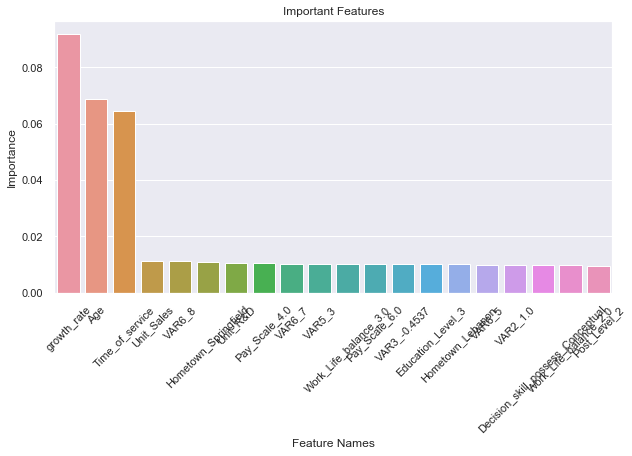

In [47]:
imp_feat_index=imp_features(X_init_final,Y_init,X_init_final.columns,20)

In [43]:
imp_feat_index

array([ 2,  0,  1, 26, 69, 27, 37, 22, 81, 68, 94, 88, 35, 43, 14, 63, 79,
       74, 66, 42], dtype=int64)

In [57]:
columns=X_init_final.columns
for col in tqdm(X_init_final.columns):
    if col not in np.take(columns,imp_feat_index):
        X_init_final.drop(col,axis=1,inplace=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 239.16it/s]


In [63]:
X_init_test_final=pd.read_csv('final_test_data.csv')
columns=X_init_test_final.columns
for col in tqdm(X_init_test_final.columns):
    if col not in np.take(columns,imp_feat_index):
        X_init_test_final.drop(col,axis=1,inplace=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 269.74it/s]


In [58]:
X_init_final.shape

(7000, 20)

In [60]:
from sklearn.model_selection import RandomizedSearchCV
base_feats_reg_params = {'max_depth':[1,5,10,20,30,40,50,60],'min_samples_split':[i for i in range(400,450)]}
score_base = make_scorer(rmse, greater_is_better=True)
base_reg_feats=DecisionTreeRegressor()
reg_cv_base = RandomizedSearchCV(base_reg_feats,base_feats_reg_params,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)
reg_cv_base.fit(X_init_final,Y_init)
results=pd.DataFrame.from_dict(reg_cv_base.cv_results_)

In [61]:
results=results.sort_values(['rank_test_score'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013764,0.005101,0.002394,0.000489,423,1,"{'min_samples_split': 423, 'max_depth': 1}",81.939184,82.021920,81.296977,81.786130,80.120320,81.432906,0.702763,1,81.309585,81.288672,81.468519,81.346897,81.771910,81.437117,0.178613
8,0.064429,0.009390,0.012968,0.014698,411,5,"{'min_samples_split': 411, 'max_depth': 5}",81.620619,81.847084,81.198639,81.636203,80.022883,81.265085,0.655795,2,81.447748,81.413891,81.581864,81.444926,81.864415,81.550569,0.167268
9,0.057844,0.007597,0.007783,0.007684,430,5,"{'min_samples_split': 430, 'max_depth': 5}",81.620619,81.874210,81.159610,81.638253,80.022883,81.263115,0.661946,3,81.447748,81.404896,81.566478,81.441065,81.864415,81.544921,0.168746
6,0.027327,0.006231,0.010972,0.017458,442,10,"{'min_samples_split': 442, 'max_depth': 10}",81.567065,81.810401,81.069333,81.563324,79.932208,81.188466,0.672761,4,81.531904,81.467844,81.642236,81.523944,82.003605,81.633907,0.193297
7,0.042686,0.022090,0.007780,0.011078,428,10,"{'min_samples_split': 428, 'max_depth': 10}",81.567065,81.810401,81.069333,81.563324,79.932208,81.188466,0.672761,4,81.531904,81.467844,81.642236,81.523944,82.003605,81.633907,0.193297


In [64]:
# passing best param values to classifier as found by cross validation.
mDT_best_feats=DecisionTreeRegressor(max_depth=1,min_samples_split=423)
# training the model.
mDT_best_feats.fit(X_init_final,Y_init)
# using the trained model.
Y_test_pred=mDT_best_feats.predict(X_init_test_final)

In [65]:
test_base_attrition_rate = pd.Series(Y_test_pred, name = "Attrition_rate").astype(float)
results = pd.concat([final_submission, test_base_attrition_rate],axis = 1)

In [68]:
results.to_csv('alpha_feats_1.csv',index=False)

In [69]:
results.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.194016
1,EID_9658,0.182664
2,EID_22203,0.182664
3,EID_7652,0.194016
4,EID_6516,0.194016


## XGBoost on selected features.

In [77]:
parameters_final_tune_xgb = {"gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
               "reg_lambda": [1,1.5,2,2.5,3,3.5,4,4.5,5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": range(0,1000,100)}

xgb_reg_cv_final = RandomizedSearchCV(xgb.XGBRegressor(objective= 'reg:squarederror', nthread=-1),parameters_final_tune_xgb,cv=5,scoring=score_base,n_jobs=-1,return_train_score=True)

xgb_reg_cv_final.fit(X_init_final,Y_init)
results_xgb_params_final=pd.DataFrame.from_dict(xgb_reg_cv_final.cv_results_)

results_xgb_params_final=results_xgb_params_final.sort_values(['rank_test_score'])
results_xgb_params_final.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,3.273134,0.273415,0.010291,0.001203,0.2,1.5,0.8,200,7,4,0.1,1,0.3,"{'subsample': 0.2, 'reg_lambda': 1.5, 'reg_alp...",81.953119,82.031478,81.286318,81.767659,80.136032,81.434921,0.699188,1,81.295955,81.276086,81.460935,81.341151,81.761976,81.427220,0.179264
1,6.664850,0.053175,0.012978,0.001267,0.4,1.5,0.1,400,5,4,0.1,0.5,0.3,"{'subsample': 0.4, 'reg_lambda': 1.5, 'reg_alp...",81.971132,81.999163,81.283378,81.764228,80.120649,81.427710,0.702047,2,81.344486,81.326391,81.528656,81.405763,81.798832,81.480826,0.174062
0,1.790623,0.045241,0.011607,0.003390,0.7,1.5,0.3,100,3,4,0.1,0.3,0.3,"{'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alp...",81.930973,82.018838,81.283283,81.779508,80.121952,81.426911,0.700332,3,81.399976,81.346212,81.541419,81.406380,81.840661,81.506929,0.178855


In [71]:
xgb_final_mod = xgb.XGBRegressor(n_estimators=250, max_depth=2,learning_rate=0.1,
 min_child_weight=5, gamma=0.5, subsample=0.4,reg_lambda=3,reg_alpha=0, colsample_bytree=0.3, nthread=-1)
# xgb_final_mod = xgb.XGBRegressor(n_estimators=500,max_depth=2)
xgb_final_mod.fit(X_init_final,Y_init)
Y_test_pred_xgb = xgb_final_mod.predict(X_init_test_final)

test_xgb_attrition_rate = pd.Series(Y_test_pred_xgb, name = "Attrition_rate").astype(float)
results_xgb = pd.concat([final_submission, test_xgb_attrition_rate],axis = 1)

results_xgb.to_csv("beta_feats_1.csv", index = False)

### Future scope

- Use KNN to predict missing feature values.
- Group categorical data to check improve in evaluation metric score.
- Use CATBoost.